# Topyfic on Hippocampus time course ENCODE4

### *Narges Rezaie*
#### Vignette built on Jan 18, 2024 with Topyfic version 0.4.12.

The aim of this tutorials is to show how to use Topyfic using multiple datasets coming from different technology and how Topyfic handles batches across datasets.

## Datasets
We pooled out the count matrix using ENCODE portal and annoted them. For more info look at [this](https://github.com/erebboah/enc4_mouse_paper).

## Training Topyfic
We train parse and 10x seperately to get train object. After figuring out which K is the best for each dataset, we are ready to make TopModel.

To focus more on the creating TopModel, We didn't include the training part but we follow the same strategy we used [here](https://github.com/mortazavilab/Topyfic/blob/main/tutorials/C2C12_TFs_mirhgs_chromreg/C2C12.ipynb).

In [2]:
import Topyfic
import pandas as pd
import scanpy as sc
import numpy as np

In [4]:
parse = sc.read_h5ad("data/hippocampus_Parse.h5ad")
multiome = sc.read_h5ad("data/hippocampus_10x.h5ad")

data = parse.concatenate(multiome)
data.shape

(78167, 2701)

## Read train models

In [5]:
train_parse = Topyfic.read_train(f"train_parse_hipp_12.p")
train_10x = Topyfic.read_train(f"train_10x_hipp_13.p")

Reading Train done!
Reading Train done!


In [8]:
print(f"Name of Train parse object: {train_parse.name}")
print(f"Name of Train 10x object: {train_10x.name}")

Name of Train parse object: parse_hipp_12
Name of Train 10x object: 10x_hipp_13


## Create topmodel

If you want to do batch correction using harmony, name of the training objects should be different and based on the name of train object, Topyfic will either run harmony or not.

In this case since the name of the train objects are differe, Harmony will run, when we call `calculate_leiden_clustering()`. you can also control the number of itertaiotn by tuning `max_iter_harmony=10`.

         Falling back to preprocessing with `sc.pp.pca` and default params.


2023-08-02 11:42:00,809 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-02 11:42:01,700 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-02 11:42:01,710 - harmonypy - INFO - Iteration 1 of 10
2023-08-02 11:42:02,064 - harmonypy - INFO - Iteration 2 of 10
2023-08-02 11:42:02,354 - harmonypy - INFO - Iteration 3 of 10
2023-08-02 11:42:02,625 - harmonypy - INFO - Iteration 4 of 10
2023-08-02 11:42:02,890 - harmonypy - INFO - Iteration 5 of 10
2023-08-02 11:42:03,151 - harmonypy - INFO - Iteration 6 of 10
2023-08-02 11:42:03,410 - harmonypy - INFO - Iteration 7 of 10
2023-08-02 11:42:03,677 - harmonypy - INFO - Iteration 8 of 10
2023-08-02 11:42:03,940 - harmonypy - INFO - Iteration 9 of 10
2023-08-02 11:42:04,112 - harmonypy - INFO - Converged after 9 iterations


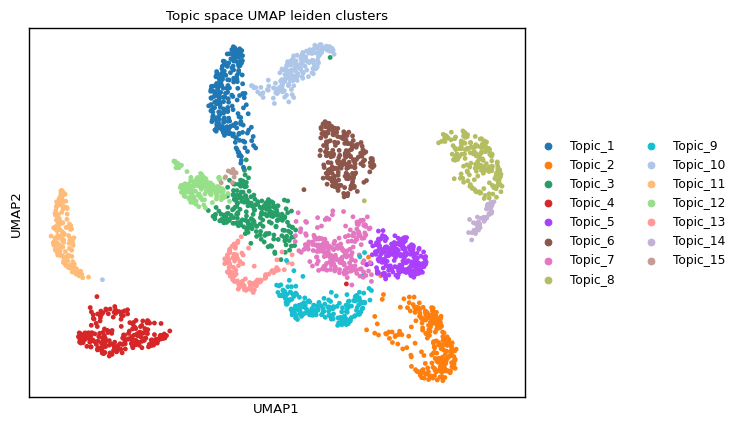

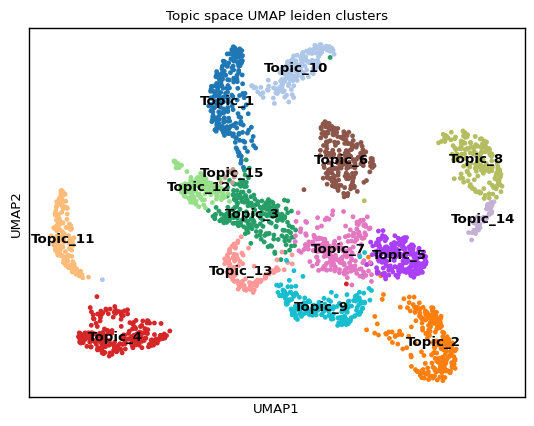

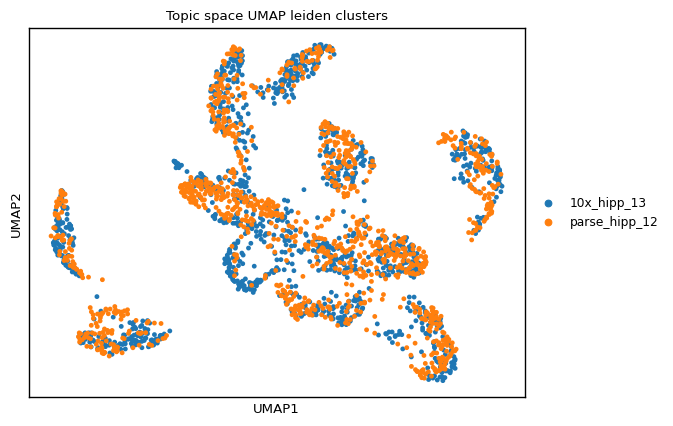

14 topics out of 15 topics have participation more than 362.22
Saving topModel as topModel_10x_hipp_13_parse_hipp_12.p


In [4]:
trains = [train_parse, train_10x]
top_model, clustering, adata = Topyfic.calculate_leiden_clustering(trains=trains, 
                                                                   data=data, 
                                                                   resolution=1, 
                                                                   min_cell_participation=362.22)

genes = pd.read_csv("../gene_display_table.csv", index_col=0)
genes.index = genes.gene_name

for key in top_model.topics.keys():
    top_model.topics[key].update_gene_information(genes)

top_model.save_topModel()
adata.write_h5ad(f"hippocampus.h5ad")
clustering.to_csv(f"hippocampus.csv")

To check how well the clusters(topics) are mixed, we can use `plot_cluster_contribution()`.

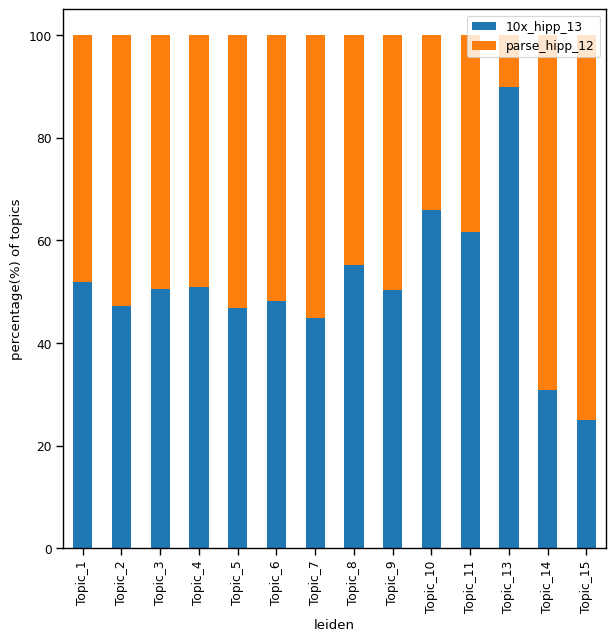

In [5]:
clustering = pd.read_csv(f"hippocampus.csv", index_col=0)
Topyfic.plot_cluster_contribution(clustering,
                                  portion=True,
                                  feature="assays",
                                  file_format="png",
                                  file_name='figures/cluster_contribution')

Rest of the analysis inclusing creating analysis object and downstream analysis will be similar to the other toturials.